In [96]:
import pandas as pd

In [97]:
gender_data = pd.read_csv("data/gender_submission.csv")
test_data = pd.read_csv("data/test.csv")

In [98]:
gender_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [99]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [100]:
gender_data["PassengerId"].equals(test_data["PassengerId"])

True

In [101]:
merged_data = pd.merge(test_data, gender_data[["PassengerId", "Survived"]], on="PassengerId", how="left")

In [102]:
merged_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

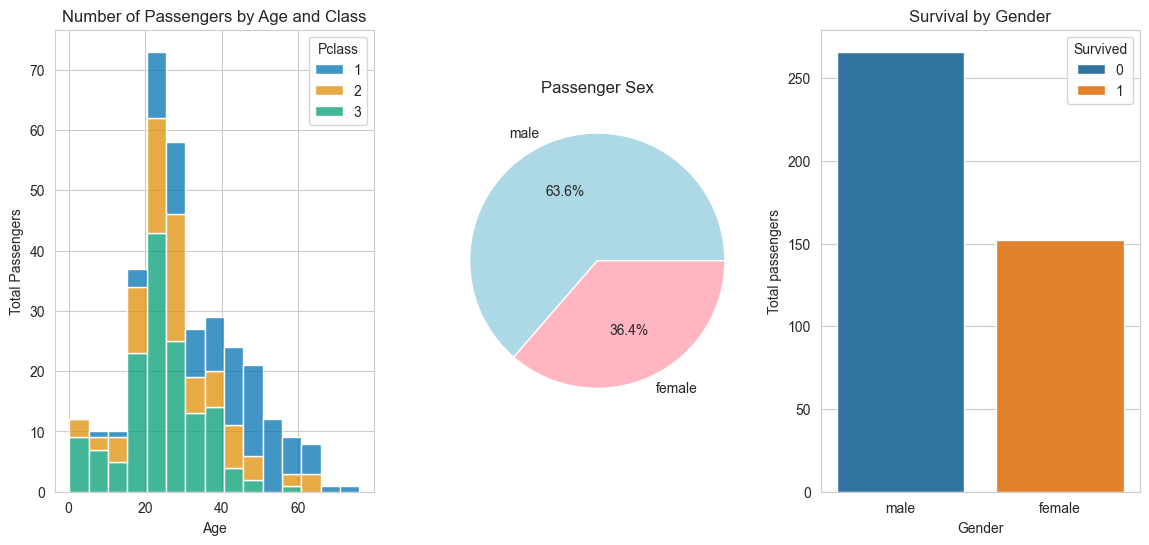

In [104]:
fig, axes = plt.subplots(1, 3, figsize=(14, 6))

sns.histplot(data=merged_data, ax=axes[0], x="Age", hue="Pclass", multiple="stack",palette="colorblind");
axes[0].set_title("Number of Passengers by Age and Class")
axes[0].set_ylabel("Total Passengers")

gender_counts = merged_data["Sex"].value_counts()

axes[1].pie(gender_counts,labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightpink']);
axes[1].set_title("Passenger Sex")

axes[2] = sns.countplot(data=merged_data,x="Sex",hue="Survived")
axes[2].set_title("Survival by Gender")
axes[2].set_ylabel("Total passengers")
axes[2].set_xlabel("Gender");

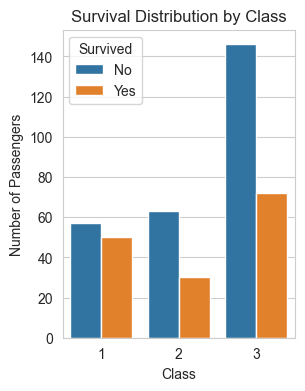

In [105]:
sns.set_style("whitegrid")
plt.figure(figsize=(3,4))
ax = sns.countplot(data=merged_data, x="Pclass",hue="Survived")
ax.set_xlabel("Class")
ax.set_ylabel("Number of Passengers")
ax.set_title("Survival Distribution by Class")
ax.legend(title='Survived', loc='upper left', labels=['No', 'Yes']);

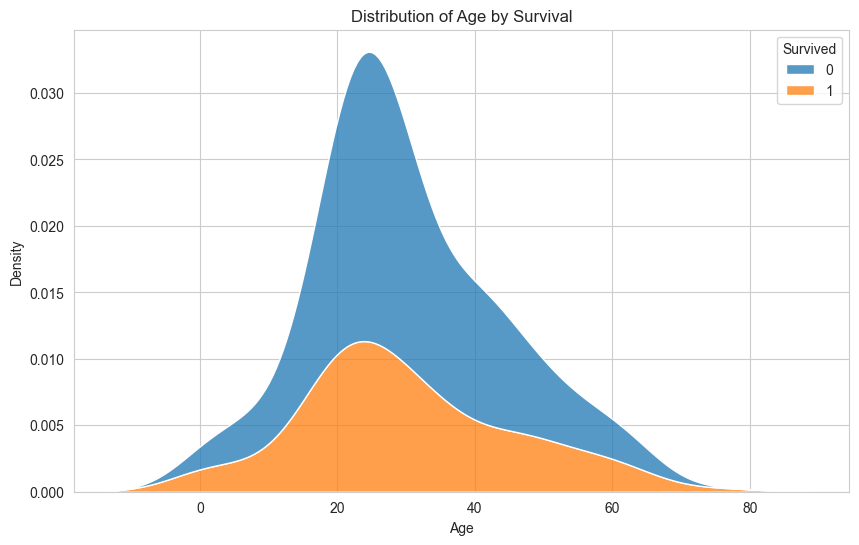

In [106]:
plt.figure(figsize=(10, 6))
ax = sns.kdeplot(data=merged_data, x="Age", hue="Survived", multiple="stack")
ax.set_title("Distribution of Age by Survival");

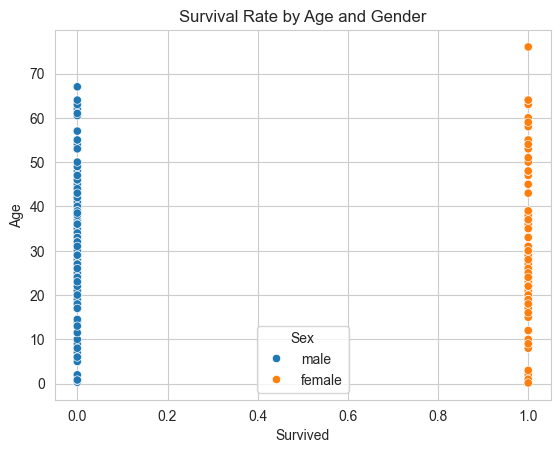

In [107]:
fig, ax = plt.subplots()
ax = sns.scatterplot(data=merged_data, x="Survived",y="Age",hue="Sex")
ax.set_title("Survival Rate by Age and Gender");

In [108]:
merged_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


Text(0.5, 1.0, 'Survival by Family Passengers on board')

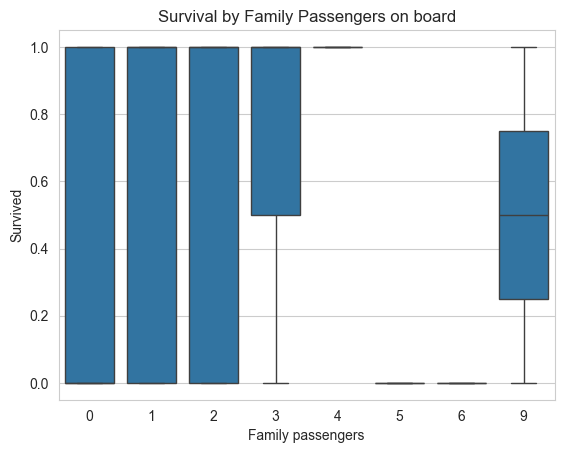

In [109]:
sns.boxplot(data=merged_data,x="Parch",y="Survived");
plt.xlabel("Family passengers")
plt.title("Survival by Family Passengers on board")

In [110]:
merged_data[merged_data["Parch"]==3]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.375,B57 B59 B63 B66,C,1
142,1034,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.375,B57 B59 B63 B66,C,0
178,1070,2,"Becker, Mrs. Allen Oliver (Nellie E Baumgardner)",female,36.0,0,3,230136,39.000,F4,S,1
